In [1]:
%pylab inline
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
binfile = '/mnt/store1/oliverphilcox/PowerSpectra/k_binning.csv'
counts_dir = '/mnt/store1/oliverphilcox/PowerTest/'
counts_dir_binned = '/mnt/store1/oliverphilcox/PowerTest_QPM/'
n = 18
m = 3

In [154]:
k_bins = np.loadtxt(binfile).mean(axis=1)
all_k = np.loadtxt(binfile)

In [164]:
k_bins2 = np.loadtxt('/mnt/store1/oliverphilcox/PowerSpectra/k_binning_high.csv').mean(axis=1)

#### Load Counts

In [402]:
counts_dir = '/mnt/store1/oliverphilcox/PowerTest_3/'
DDb = np.loadtxt(counts_dir+'DD_power_counts_n%d_m%d_full.txt'%(n,m))
# DRb = np.loadtxt(counts_dir+'DR_power_counts_n%d_m%d_full.txt'%(n,m))
# RRb = np.zeros_like(DRb)
# index = 0
# while True:
#     filename = counts_dir+'RR_%d_power_counts_n%d_m%d_full.txt'%(index,n,m)
#     if not os.path.exists(filename):
#         break
#     RRb+=np.loadtxt(filename)
#     index+=1

In [403]:
counts_dir = '/mnt/store1/oliverphilcox/PowerTest_4/'
DDc = np.loadtxt(counts_dir+'DD_power_counts_n%d_m%d_full.txt'%(n,m))
# DRb = np.loadtxt(counts_dir+'DR_power_counts_n%d_m%d_full.txt'%(n,m))
# RRb = np.zeros_like(DRb)
# index = 0
# while True:
#     filename = counts_dir+'RR_%d_power_counts_n%d_m%d_full.txt'%(index,n,m)
#     if not os.path.exists(filename):
#         break
#     RRb+=np.loadtxt(filename)
#     index+=1

In [404]:
counts_dir = '/mnt/store1/oliverphilcox/PowerTest_QPM/'
DD = np.loadtxt(counts_dir+'DD_mock_1_power_counts_n%d_m%d_full.txt'%(n,m))
DR = np.loadtxt(counts_dir+'DR_mock_1_power_counts_n%d_m%d_full.txt'%(n,m))
RR = np.zeros_like(DR)
index = 0
while True:
    filename = counts_dir+'RR_%d_power_counts_n%d_m%d_full.txt'%(index,n,m)
    if not os.path.exists(filename):
        break
    RR+=np.loadtxt(filename)
    index+=1

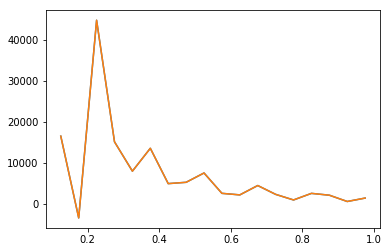

In [405]:
#plt.plot(k_bins,DD.reshape(n,m)[:,0])
plt.plot(k_bins,DDb[:,0])
plt.plot(k_bins,DDc[:,0])

In [406]:
power_estimate = (DD-2.*DR/(DR_pairs/DD_pairs)+RR/(RR_pairs/DD_pairs))/norm

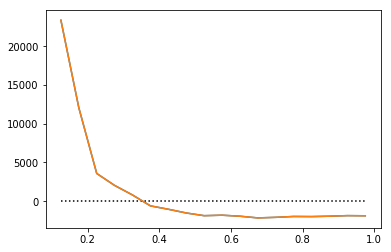

In [407]:
#plt.plot(k_bins,DD[1::3])#[1::3])
plt.plot(k_bins,DDb[:,1])
plt.plot(k_bins,DDc[:,1])
plt.hlines(0,min(k_bins),max(k_bins),linestyles=':')

Check histograms of particle separations in data vs randoms

In [384]:
dat = np.loadtxt('/mnt/store1/oliverphilcox/PowerSpectra/qpm_galaxy_1.xyzwj')
sep=[]
fir=dat[396773]
for i in range(len(dat)):
    par=dat[i]
    sep.append(np.sqrt((par[0]-fir[0])**2.+(par[1]-fir[1])**2.+(par[2]-fir[2])**2.))

In [389]:
fir=dat[396773]
mu=[]
sep=[]
norm_fir = np.sqrt(fir[0]**2.+fir[1]**2.+fir[2]**2.)
for i in range(len(dat)):
    par=dat[i]
    sep.append(np.sqrt((par[0]-fir[0])**2.+(par[1]-fir[1])**2.+(par[2]-fir[2])**2.))
    mu.append((par[0]*fir[0]+par[1]*fir[1]+par[2]*fir[2])/(np.sqrt(par[0]**2.+par[1]**2.+par[2]**2.)*norm_fir))

In [383]:
np.where((dat[:,0]>-1000)&(dat[:,0]<-990)&(dat[:,1]>-0)&(dat[:,1]<10)&(dat[:,2]<730)&(dat[:,2]>700))

(array([396773]),)

In [388]:
np.where((dat2[:,0]>-1000)&(dat2[:,0]<-990)&(dat2[:,1]>-10)&(dat2[:,1]<20)&(dat2[:,2]<740)&(dat2[:,2]>700))

(array([444822]),)

In [390]:
sep2=[]
mu2=[]
fir2=dat2[444822]
norm_fir2 = np.sqrt(fir2[0]**2.+fir2[1]**2.+fir2[2]**2.)
for i in range(len(dat2)):
    par2=dat2[i]
    sep2.append(np.sqrt((par2[0]-fir2[0])**2.+(par2[1]-fir2[1])**2.+(par2[2]-fir2[2])**2.))
    mu2.append((par2[0]*fir2[0]+par2[1]*fir2[1]+par2[2]*fir2[2])/(np.sqrt(par2[0]**2.+par2[1]**2.+par2[2]**2.)*norm_fir2))

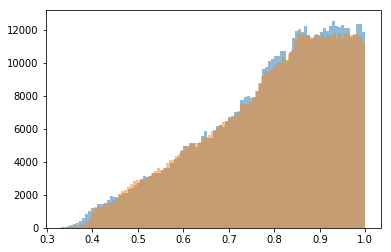

In [391]:
plt.hist(mu,bins=100,alpha=0.5);
plt.hist(mu2,bins=100,alpha=0.5);

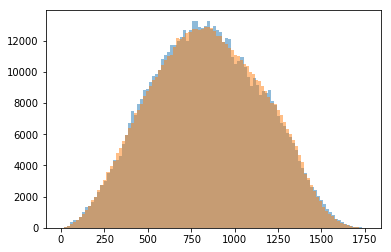

In [392]:
plt.hist(sep,bins=100,alpha=0.5);
plt.hist(sep2,bins=100,alpha=0.5);

In [298]:
dat2 = np.loadtxt('/mnt/store1/oliverphilcox/PowerSpectra/qpm_randoms_50x_mixed_0')
sep2=[]
fir2=dat2[4063]
for i in range(len(dat2)):
    par2=dat2[i]
    sep2.append(np.sqrt((par2[0]-fir2[0])**2.+(par2[1]-fir2[1])**2.+(par2[2]-fir2[2])**2.))

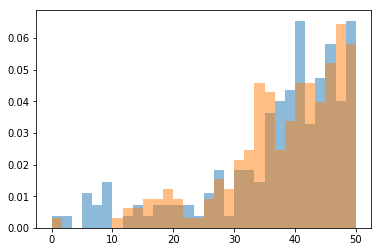

In [315]:
plt.hist(sep,range=[0,50],bins=30,density=True,alpha=0.5);
plt.hist(sep2,range=[0,50],bins=30,density=True,alpha=0.5);

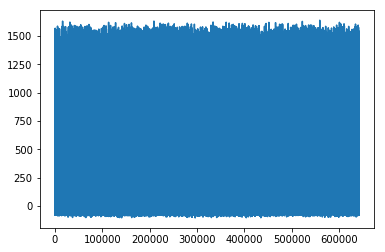

In [324]:
plt.plot(dat[:,2])

In [395]:
all_gal = np.loadtxt('/mnt/store1/oliverphilcox/PowerSpectra/qpm_galaxy_1.xyzwj')
ind = np.random.choice(range(len(all_gal)),len(all_gal),replace=False)

In [401]:
np.savetxt('/mnt/store1/oliverphilcox/PowerSpectra/qpm_galaxy_1_mixed.xyzwj',all_gal[ind],delimiter='\t')

In [225]:
power_estimate = (DD-2.*DR/(DR_pairs/DD_pairs)+RR/(RR_pairs/DD_pairs))/norm

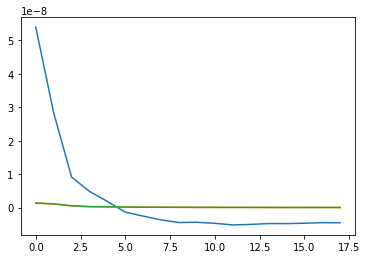

In [226]:
ell=1
plt.plot(DD.reshape(n,m)[:,ell]/DD_pairs)
plt.plot(DR.reshape(n,m)[:,ell]/DR_pairs)
plt.plot(RR.reshape(n,m)[:,ell]/RR_pairs)

In [88]:
gal_file = '/mnt/store1/oliverphilcox/DR12_QPM/processed/qpm_galaxy_1.xyzwj'
gal_w = np.loadtxt(gal_file)[:,3]
poiss_power = np.sum(gal_w**2.)/norm

In [97]:
gal_n = (1./gal_w-1.)/20000

In [99]:
1./np.mean(gal_n)

3351.326355783734

In [95]:
poiss_power

5308.702737890351

In [52]:
tDD=DD.reshape(n,m)[:,1]
tDDb=DDb.reshape(n,m)[:,1]
plt.plot(tDD-tDRb)

NameError: name 'tDRb' is not defined

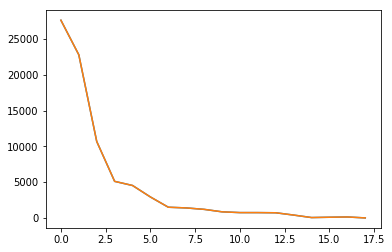

In [40]:
plt.plot(RR.reshape(n,m)[:,1])
plt.plot(RRb.reshape(n,m)[:,1])

In [ ]:
power_estimate = (DDb-2.*DRb/(DR_pairs/DD_pairs)+RRb/(RR_pairs/DD_pairs))/norm

In [8]:
DD_binned = np.loadtxt('/mnt/store1/oliverphilcox/PowerTest_QPM/DD_mock_1_power_counts_n%d_m%d_full.txt'%(n,m))
DD_unbinned = np.loadtxt('/mnt/store1/oliverphilcox/PowerTest_QPM/DD_power_counts_n%d_m%d_full.txt'%(n,m))

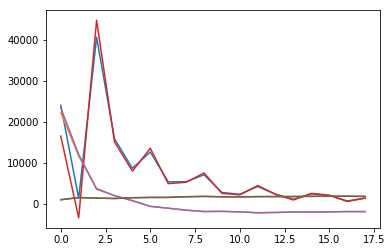

In [14]:
plt.plot(DD_binned.reshape(n,m))
plt.plot(DD_unbinned.reshape(n,m))

In [3]:
DD = np.loadtxt(counts_dir+'DD_power_counts_n%d_m%d_full.txt'%(n,m))
DR = np.loadtxt(counts_dir+'DR_power_counts_n%d_m%d_full.txt'%(n,m))
RR = np.zeros_like(DR)
index = 0
while True:
    filename = counts_dir+'RR_%d_power_counts_n%d_m%d_full.txt'%(index,n,m)
    if not os.path.exists(filename):
        break
    RR+=np.loadtxt(filename)
    index+=1

OSError: /mnt/store1/oliverphilcox/PowerTest/DD_power_counts_n18_m3_full.txt not found.

In [272]:
DD_binned = np.loadtxt(counts_dir_binned+'DD_power_counts_n%d_m%d_full.txt'%(n,m))
DR_binned = np.loadtxt(counts_dir_binned+'DR_power_counts_n%d_m%d_full.txt'%(n,m))
RR_binned = np.zeros_like(DR_binned)
index = 0
while True:
    filename = counts_dir_binned+'RR_%d_power_counts_n%d_m%d_full.txt'%(index,n,m)
    if not os.path.exists(filename):
        break
    RR_binned+=np.loadtxt(filename)
    index+=1

#### Compute number of pairs

In [75]:
### count number of random particles
rand_par = '/mnt/store1/oliverphilcox/PowerSpectra/qpm_randoms_50x.xyzwj'
with open(rand_par) as infile:
    for l,line in enumerate(infile):
        pass
N_rand = l+1

In [76]:
### count number of galaxies
gal_par = '/mnt/store1/oliverphilcox/Legendre2PCF/qpm_galaxy_1.xyzwj'
with open(gal_par) as infile:
    for l,line in enumerate(infile):
        pass
N_gal = l+1

In [77]:
### count number of galaxies
index = 0.
RR_pairs = 0.
while True:
    this_rand_par = '/mnt/store1/oliverphilcox/PowerSpectra/qpm_randoms_50x_%d'%index
    if not os.path.exists(this_rand_par):
        break
    with open(this_rand_par) as infile:
        for l,line in enumerate(infile):
            pass
    RR_pairs+=(l+1)*l
    index+=1

In [78]:
DR_pairs = N_rand*N_gal
DD_pairs = N_gal*(N_gal-1.)

#### Compute normalization

In [79]:
rand_par = '/mnt/store1/oliverphilcox/PowerSpectra/qpm_randoms_50x.xyzwj'
norm = 0.
with open(rand_par) as infile:
    for l,line in enumerate(infile):
        this_w = float(line.split()[3])
        norm+=this_w**2.*(1./this_w-1.)/20000
norm*=(N_gal/N_rand)

### Compute power estimates

In [234]:
power_estimate = (DD-2.*DR/(DR_pairs/DD_pairs)+RR/(RR_pairs/DD_pairs))/norm

In [282]:
binned_power_estimate = (DD_binned-2.*DR_binned/(DR_pairs/DD_pairs)+RR_binned/(RR_pairs/DD_pairs))/norm

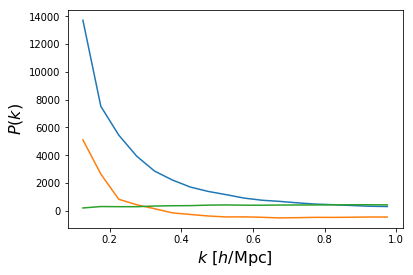

In [285]:
#plt.plot(k_bins,power_estimate)
plt.plot(k_bins,binned_power_estimate.reshape(-1,3))
#plt.yscale('log')
plt.ylabel(r'$P(k)$',fontsize=16);plt.xlabel(r'$k\,\,[h/$Mpc]',fontsize=16);

**Add simple CAMB model for comparison**

In [196]:
power_model=np.load('/mnt/store1/oliverphilcox/PowerSpectra/linear_kaiser_power.npz')
kh = power_model['k']
pk = power_model['pow'][0]

## First fit power spectrum to spline
from scipy.interpolate import UnivariateSpline
spl = UnivariateSpline(np.log(kh),np.log(pk[:]),s=1)
def linear_power_model(k):
    return np.exp(spl(np.log(k)))

def kaiser_power_model(k,ell):
    """ Kaiser linear power model from https://wwwmpa.mpa-garching.mpg.de/~komatsu/lecturenotes/Shun_Saito_on_RSD.pdf"""
    f = 0.774 # jaiser power
    b = 2 # bias
    lin_pow = linear_power_model(k)
    beta = f/b
    if ell==0:
        return (1.+2./3.*beta+1./5.*beta**2.)*b**2.*lin_pow
    elif ell==2:
        return (4./3.*beta+4./7.*beta**2.)*b**2.*lin_pow
    elif ell==4:
        return 8./45.*beta**2.*b**2.*lin_pow
    else:
        raise Exception("Only ell = 0,2,4 in linear model")

In [197]:
from scipy.integrate import quad

ell=0

#binned_power = []
true_binned_power = []
true_point_power = []

for i in range(len(all_k)):
    #binned_power.append(quad(lambda k: kaiser_power_model(k,2)*k,all_k[i,0],all_k[i,1])[0]/quad(lambda k: k,k_bins[i,0],k_bins[i,1])[0])
    true_binned_power.append(quad(lambda k: kaiser_power_model(k,0)*k**2.,all_k[i,0],all_k[i,1])[0]/quad(lambda k: k**2.,all_k[i,0],all_k[i,1])[0])
    true_point_power.append(kaiser_power_model(np.mean([all_k[i,0],all_k[i,1]]),0))

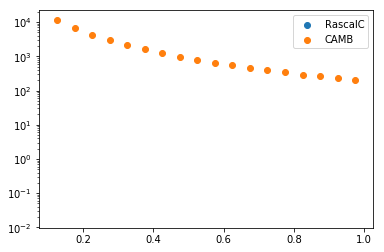

In [198]:
plt.scatter(k_bins,power_estimate,label='RascalC')
plt.scatter(k_bins,true_point_power,label='CAMB');
plt.legend();plt.yscale('log');

#### Compare binned vs unbinned

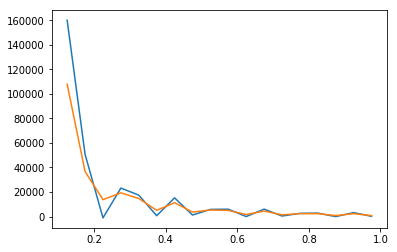

In [105]:
plt.plot(k_bins,DD)
plt.plot(k_bins,DD_binned)

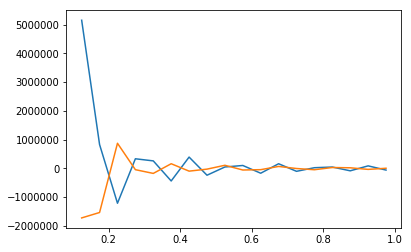

In [107]:
plt.plot(k_bins,DR)
plt.plot(k_bins,DR_binned)